In [3]:
from __future__ import division
from sympy import *
import sympy as sp
import numpy as np
import csv
import pandas as pd
import matplotlib

#### Definindo a função f(x) em Python NUMÉRICO - NUMPY - NP
\begin{equation*}
f\left(x\right) = sin(x)- x^{2} + 4 
\end{equation*}

In [4]:
def f(x): return np.sin(x)-np.square(x)+4

#### Definindo a função f(x) em Python SIMBÓLICO - SYMPY - SP



In [5]:
def sf(x):  return sp.sin(x)-(x**2)+4

#### Definindo a função g(x) em Python NUMÉRICO - NUMPY - NP
\begin{equation*}
g\left(x\right) = sin(x)- e^{x}
\end{equation*}

In [6]:
def g(x): return np.exp(x)-np.sin(x)

#### Definindo a função g(x) em Python NUMÉRICO - SYMPY - SP

In [7]:
def sg(x): return sp.exp(x)-sp.sin(x)

In [8]:
x, y = symbols('x y')
init_printing()

#### Função que Calcula o numero de iterações mínimas

\begin{equation*}
 \frac{log(b - a) - log( \epsilon )}{log(2)}
\end{equation*}

In [9]:
def min(a,b): return (np.log10(int_b - int_a) - np.log10(0.001))/np.log10(2)

## Método da Bisseção em f(x) e g(x)

In [10]:
def bissetion (a, b, f):
    k = 0
    erro = abs((a - b))
    
    ### ESCREVE NO CSV
    file = open('fx.csv', 'w', newline='')

    with file:
    
        fnames = ['k','a','b','m','f_a','f_b','f_m','b-a']
        writer = csv.DictWriter(file, fieldnames=fnames)
        writer.writeheader()
        
        while(erro > 0.001):

            erro = abs((b - a))

            m = (a + b)/2

            ### ESCREVE NO CSV
            e = b-a
            writer.writerow({'k': k, 'a': a, 'b': b, 'm': m, 'f_a': f(a), 'f_b': f(b), 'f_m': f(m), 'b-a': e})

            if(f(m)*f(a) >= 0):
                a = m
            else:
                b = m

            k = k+1

## Método de Newton-Raphson em f(x) e g(x)

In [37]:
def newton_raphson(a, b, f):

    val = (a + b)/2
    delta = 1

    file = open('mn.cvs', 'w', newline='')
    with file: 
        fdata = ['x_k','fx_k','dx_k', 'delta']
        writer = csv.DictWriter(file, fieldnames=fdata)
        writer.writeheader()    

        while(delta > 0.001):
            #FAZ A DERIVAÇÃO E APLICA 
            dif = diff(f(x)).subs(x,val)
            func = f(x).subs(x,val)
            val_1 = val - (func/dif)
            delta = abs(val - val_1)

            writer.writerow({'x_k': val,'fx_k': func, 'dx_k': dif, 'delta': delta})

            val = val_1

# Questão 1

#### Para: 
\begin{equation*}
f\left(x\right) = sin(x)- x^{2} + 4 
\end{equation*}

Temos que definir o intervalo que queremos analisar para defirir quais são os intervalos onde estão as raízes da função que nos é dada, sendo:

**int_a** - O elemento a de [a, b] 

**int_b** - O elemento b de [a, b]

In [11]:
int_a = -5
int_b = 5
for i in range(int_a,int_b+1,1):
    print("f(",i,") =\t ",f(i))

f( -5 ) =	  -20.04107572533686
f( -4 ) =	  -11.243197504692072
f( -3 ) =	  -5.1411200080598665
f( -2 ) =	  -0.9092974268256819
f( -1 ) =	  2.1585290151921033
f( 0 ) =	  4.0
f( 1 ) =	  3.8414709848078967
f( 2 ) =	  0.9092974268256819
f( 3 ) =	  -4.8588799919401335
f( 4 ) =	  -12.756802495307927
f( 5 ) =	  -21.95892427466314


### Gráfico 

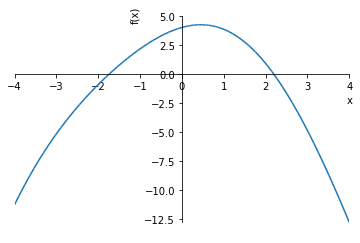

In [13]:
plot(sf(x),(x,-4,4))


#### Para: 
\begin{equation*}
f\left(x\right) = sin(x) - e^{x} 
\end{equation*}

Temos que definir o intervalo que queremos analisar para defirir quais são os intervalos onde estão as raízes da função que nos é dada, sendo:

**int_a** - O elemento a de [a, b] 

**int_b** - O elemento b de [a, b]

In [14]:
int_a = -10
int_b = 5
for i in range(int_a,int_b+1,1):
    print("f(",i,") =\t",g(i))

f( -10 ) =	 -0.5439757109596073
f( -9 ) =	 0.4122418950458433
f( -8 ) =	 0.9896937092512843
f( -7 ) =	 0.6578984806843435
f( -6 ) =	 -0.2769367460222595
f( -5 ) =	 -0.952186327664053
f( -4 ) =	 -0.738486856419194
f( -3 ) =	 0.19090707642773116
f( -2 ) =	 1.0446327100622943
f( -1 ) =	 1.2093504259793388
f( 0 ) =	 1.0
f( 1 ) =	 1.8768108436511486
f( 2 ) =	 6.4797586721049685
f( 3 ) =	 19.9444169151278
f( 4 ) =	 55.354952528452166
f( 5 ) =	 149.37208337723973


### Gráfico 

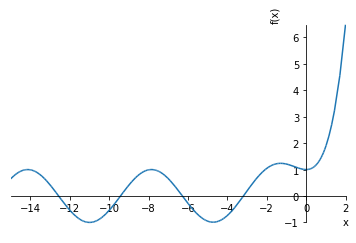

In [15]:
plot(sg(x),(x,-15,2))

# Questão 2

Para descobir quantas iterações são feitas - PELO MENOS - para achar uma raiz, usamos a seguinte forma

\begin{equation*}
 k \geq \frac{log(b - a) - log( \epsilon )}{log(2)}
\end{equation*}

sendo $\epsilon$ igual a $0,001$

Para tal, definimos o nosso intervalo como sendo:  
**int_a** - O elemento a de [a, b] que é considerado o intervalo que contem a raiz

**int_b** - O elemento b de [a, b] que é considerado o intervalo que contem a raiz

#### Para: 
\begin{equation*}
f\left(x\right) = sin(x)- x^{2} + 4 
\end{equation*}


In [16]:
int_a = 2
int_b = 3

k = min(int_a,int_b)
print("K de [2,3]",k)

int_a = -2
int_b = -1
k = min(int_a,int_b)
print("K de [-2,-1]",k)


K de [2,3] 9.965784284662087
K de [-2,-1] 9.965784284662087


Considera-se portanto que o numero mínimo de iterações é $10$

#### Para: 
\begin{equation*}
f\left(x\right) = sin(x) - e^{x} 
\end{equation*}

fazemos o mesmo processo

In [17]:
int_a = -10
int_b = -9

k = min(int_a,int_b)
print("K de [-10,-9]",k)

int_a = -7
int_b = -6

k = min(int_a,int_b)
print("K de [-7,-6]",k)

int_a = -4
int_b = -3

k = min(int_a,int_b)
print("K de [-4,-3]",k)

K de [-10,-9] 9.965784284662087
K de [-7,-6] 9.965784284662087
K de [-4,-3] 9.965784284662087


# Questão 3

### Método da Bisseção

Também conhecido como truncamento binário, ou método de Bolzano.
Suponha que o intervalo $[a,b]$ contém uma única raiz para $f ( x ) = 0$. O Objetivo é reduzir a amplitude do intervalo que contém a raiz até se atingir a precisão requerida $b − a < \epsilon = 0,001$, neste caso, usando a divisão sucessiva de $[a,b]$ ao meio.
![title](bpic.png)

#### Para: 
\begin{equation*}
f\left(x\right) = sin(x)- x^{2} + 4 
\end{equation*}

temos:


In [63]:
int_a = 2
int_b = 3
bissetion (int_a, int_b, f)

In [64]:
pd.read_csv('fx.csv')

,k,a,b,m,f_a,f_b,f_m,b-a
0,0,2.000000,3.000000,2.500000,0.909297,-4.858880,-1.651528,1.000000
1,1,2.000000,2.500000,2.250000,0.909297,-1.651528,-0.284427,0.500000
2,2,2.000000,2.250000,2.125000,0.909297,-0.284427,0.334695,0.250000
3,3,2.125000,2.250000,2.187500,0.334695,-0.284427,0.030633,0.125000
4,4,2.187500,2.250000,2.218750,0.030633,-0.284427,-0.125531,0.062500
5,5,2.187500,2.218750,2.203125,0.030633,-0.125531,-0.047106,0.031250
6,6,2.187500,2.203125,2.195312,0.030633,-0.047106,-0.008151,0.015625
7,7,2.187500,2.195312,2.191406,0.030633,-0.008151,0.011263,0.007812
8,8,2.191406,2.195312,2.193359,0.011263,-0.008151,0.001561,0.003906
9,9,2.193359,2.195312,2.194336,0.001561,-0.008151,-0.003293,0.001953



#### Para: 
\begin{equation*}
f\left(x\right) = sin(x) - e^{x} 
\end{equation*}

temos:

In [67]:
int_a = -4
int_b = -3
bissetion (int_a, int_b, g)

In [68]:
pd.read_csv('fx.csv')

,k,a,b,m,f_a,f_b,f_m,b-a
0,0,-4.000000,-3.000000,-3.500000,-0.738487,0.190907,-0.320586,1.000000
1,1,-3.500000,-3.000000,-3.250000,-0.320586,0.190907,-0.069421,0.500000
2,2,-3.250000,-3.000000,-3.125000,-0.069421,0.190907,0.060529,0.250000
3,3,-3.250000,-3.125000,-3.187500,-0.069421,0.060529,-0.004616,0.125000
4,4,-3.187500,-3.125000,-3.156250,-0.004616,0.060529,0.027928,0.062500
5,5,-3.187500,-3.156250,-3.171875,-0.004616,0.027928,0.011647,0.031250
6,6,-3.187500,-3.171875,-3.179688,-0.004616,0.011647,0.003513,0.015625
7,7,-3.187500,-3.179688,-3.183594,-0.004616,0.003513,-0.000552,0.007812
8,8,-3.183594,-3.179688,-3.181641,-0.000552,0.003513,0.001480,0.003906
9,9,-3.183594,-3.181641,-3.182617,-0.000552,0.001480,0.000464,0.001953


# Questão 4

### Método de Newton

Processo iterativo de Newton-Raphson é guiado principalmente pela seguinte equação que expressa:

$$ x_{k+1} = x_{k} - \frac{f(x_{k})}{f'(x_{k})} $$

A raiz é determinada pela interseção de sucessivas retas tangentes da função em $( p_{k+1} , f ( p_{k+1} ))$ com o
eixo $x$. Isto é, partindo de $p_{0}$ , usamos a derivada em $( p_{0} , f ( p_{0} ))$ para determinar a reta tangente que corta o eixo $x$ em $p_{1}$ ; em seguida, usamos a inclinação em $( p_{1} , f( p_{1} ))$ para determinar $p_{2} $; e assim por diante...

![title](nh.png)

#### Portanto, para: 
\begin{equation*}
f\left(x\right) = sin(x)- x^{2} + 4 
\end{equation*}

temos que no intervalo $[2,3]$ que contém uma raiz:


In [40]:
a = 2
b = 3
newton_raphson(a, b, sf)

In [41]:
pd.read_csv('mn.cvs')

,x_k,fx_k,dx_k,delta
0,2.500000,-1.651528,-5.801144,0.284690
1,2.215310,-0.108206,-5.031430,0.021506
2,2.193804,-0.000648,-4.971088,0.000130


#### E para: 
\begin{equation*}
f\left(x\right) = sin(x) - e^{x} 
\end{equation*}

temos que no intervalo $[-4,-3]$ que contém uma raiz:

In [53]:
a = -4
b = -3
newton_raphson(a, b, sg)

In [54]:
pd.read_csv('mn.cvs')

,x_k,fx_k,dx_k,delta
0,-3.500000,-0.320586,0.966654,0.331645
1,-3.168355,0.015313,1.041715,0.014700
2,-3.183055,0.000008,1.040599,0.000008


# Questão 5 ---- ANULADA ----

### Erro Relativo 

#### Erro absoluto:
Diferença entre a valor exato de um número $x$ e o seu valor aproximado $x’$.

$$EA_{x} = \mid{x - x'}\mid$$

#### Erro relativo:

Como dependendo das grandezas envolvidas o erro absoluto pode não ser muito significativo, portanto empregamos o erro relativo que é o erro absoluto dividido pelo valor aproximado $x’$:

$$ ER_{x} = \frac{EA_{x}}{x'}$$

In [78]:
a = 2.193359
b = 2.194336
#ERRO ABSOLUTO - EA_x
erro_abs = abs(b - a)
#ERRO RELATIVO - ER_x
erro_rel = erro_abs/abs(-3.183105469)

print(erro_rel*100,"%")

0.030693296515453397 %
